In [ ]:
# ML libraries and modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt1
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import time
from datetime import datetime
from scipy import integrate, optimize
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
le = preprocessing.LabelEncoder()
warnings.filterwarnings('ignore')


import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV, Ridge, RidgeCV, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  #Prediction error metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from datetime import date
from pathlib import Path
import pickle
from collections import OrderedDict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

#nlargest for confirmed cases in each country
from heapq import nlargest
from operator import itemgetter


In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab Notebooks

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks


In [ ]:
#import Maryland State Budget Data
df_operating_budget = pd.read_csv('Maryland_Operating_Budget.csv',delimiter=',',error_bad_lines=False)
df_operating_budget.replace([np.inf, -np.inf], 0, inplace=True)
df_operating_budget.fillna(0, inplace=True)

In [ ]:
#Find top 100 additions to budget
df_operating_budget.nlargest(100, 'Budget')

,Agency Code,Agency Name,Agency Subobject Code,Agency Subobject Name,Budget,Category,Category Title,Comptroller Subobject Code,Comptroller Subobject Name,Description,Fiscal Year,Fund Type Name,Object Code,Object Name,Organization Code,Organization Sub Code,Program Code,Program Name,Subprogram Code,Subprogram Name,Type,Unit Code,Unit Name
57590,R00,State Department of Education,1205,EDUCATIONAL GRANTS,3.145562e+09,2,Elementary and Secondary Education,1204,Educational Grants,This program is the major State aid program fo...,2017,General Funds,12,"Grants, Subsidies, and Contributions",R00_A02_01,R00_A02_01_161,1,State Share of Foundation Program,161,Foundation,Budget - Actual,A02,Aid To Education
367465,R00,State Department of Education,1205,EDUCATIONAL GRANTS,3.056189e+09,2,Elementary and Secondary Education,1204,Educational Grants,This program is the major State aid program fo...,2019,General Funds,12,"Grants, Subsidies, and Contributions",R00_A02_01,R00_A02_01_0161,1,State Share of Foundation Program,161,State Share of Foundation Program - Formula,Budget - Actual,A02,Aid To Education
125581,R00,State Department of Education,1205,EDUCATIONAL GRANTS,3.005249e+09,2,Elementary and Secondary Education,1204,Educational Grants,This program is the major State aid program fo...,2018,General Funds,12,"Grants, Subsidies, and Contributions",R00_A02_01,R00_A02_01_161,1,State Share of Foundation Program,161,Foundation,Budget - Actual,A02,Aid To Education
672632,R00,State Department of Education,1205,EDUCATIONAL GRANTS,2.926462e+09,2,Elementary and Secondary Education,1204,Educational Grants,This program is the major State aid program fo...,2021,General Funds,12,"Grants, Subsidies, and Contributions",R00_A02_01,R00_A02_01_0161,1,State Share of Foundation Program,0161,State Share of Foundation Program - Formula,Budget - Appropriation,A02,Aid To Education
479716,R00,State Department of Education,1205,EDUCATIONAL GRANTS,2.724551e+09,2,Elementary and Secondary Education,1204,Educational Grants,This program is the major State aid program fo...,2020,General Funds,12,"Grants, Subsidies, and Contributions",R00_A02_01,R00_A02_01_0161,1,State Share of Foundation Program,0161,State Share of Foundation Program - Formula,Budget - Working,A02,Aid To Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672697,R00,State Department of Education,1205,EDUCATIONAL GRANTS,3.482406e+08,2,Elementary and Secondary Education,1204,Educational Grants,Section 5-208 of the Education Article provide...,2021,General Funds,12,"Grants, Subsidies, and Contributions",R00_A02_24,R00_A02_24_2461,24,Limited English Proficient,2461,Limited English Proficient,Budget - Appropriation,A02,Aid To Education
648923,M00,Maryland Department of Health,897,FEE PAYMENT SYSTEM,3.412720e+08,1,Health,836,Human Services Other Fee-For-Service,The Developmental Disabilities Administration ...,2021,Federal Funds,8,Contractual Services,M00_M01_02,M00_M01_02_P201,2,Community Services,P201,Community Residential Services,Budget - Appropriation,M01,Developmental Disabilities Administration
12404,J00,Department of Transportation,1430,Improve Other Than Bldgs Highway Const,3.396773e+08,4,Transportation,1430,Improve Other Than Bldgs Highway Const,This program provides funds for the capital pr...,2017,Federal Funds,14,Land and Structures,J00_B01_01,J00_B01_01_2010,1,State System Construction and Equipment,2010,Program Generated Automatically,Budget - Actual,B01,State Highway Administration
437157,J00,Department of Transportation,1202,AID TO POLITICAL SUBDIVISIONS,3.351330e+08,4,Transportation,1202,Aid To Political Subdivisions,"This program provides grants for the design, c...",2020,Special Funds,12,"Grants, Subsidies, and Contributions",J00_A01_05,J00_A01_05_2050,5,Washington Metropolitan Area Transit-Capital,2050,Washington Metropolitan Area Transit - Capital,Budget - Working,A01,The Secretary's Office


In [ ]:
#separate entries by year 2017
df_filtered2017 = df_operating_budget[df_operating_budget['Fiscal Year'] == 2017]
df_filtered2017

,Agency Code,Agency Name,Agency Subobject Code,Agency Subobject Name,Budget,Category,Category Title,Comptroller Subobject Code,Comptroller Subobject Name,Description,Fiscal Year,Fund Type Name,Object Code,Object Name,Organization Code,Organization Sub Code,Program Code,Program Name,Subprogram Code,Subprogram Name,Type,Unit Code,Unit Name
0,A15,Payments to Civil Divisions of the State,1202,AID TO POLITICAL SUBDIVISIONS,27658661.0,10,Other,1202,Aid To Political Subdivisions,Section 16-503 of the Local Government Article...,2017,General Funds,12,"Grants, Subsidies, and Contributions",A15_O00_02,A15_O00_02_2BSL,2,Teacher Retirement Supplemental Grants,2BSL,TBD,Budget - Actual,O00,Payments to Civil Divisions of the State
1,A15,Payments to Civil Divisions of the State,1202,AID TO POLITICAL SUBDIVISIONS,19695181.0,10,Other,1202,Aid To Political Subdivisions,Chapter 5 of the 2017 legislative session prov...,2017,General Funds,12,"Grants, Subsidies, and Contributions",A15_O00_04,A15_O00_04_0,4,Teacher Retirement Administrative Fee Assistance,0,Teacher Retirement Administration,Budget - Actual,O00,Payments to Civil Divisions of the State
2,A15,Payments to Civil Divisions of the State,1202,AID TO POLITICAL SUBDIVISIONS,131796185.0,10,Other,1202,Aid To Political Subdivisions,Section 16-501 of the Local Government Article...,2017,General Funds,12,"Grants, Subsidies, and Contributions",A15_O00_01,A15_O00_01_1BSL,1,Disparity Grants,1BSL,TBD,Budget - Actual,O00,Payments to Civil Divisions of the State
3,B75,Legislative Branch,857,OTHER DATA PROCESSING HARDWARE,99321.0,8,"Legislative, Judicial, Legal",857,Other Data Processing Hardware,The primary duties of the Office of Operations...,2017,General Funds,8,Contractual Services,B75_A01_04,B75_A01_04_0,4,Office of Operations and Support Services,0,TBD,Budget - Actual,A01,Legislative Branch
4,B75,Legislative Branch,1015,OFFICE EQUIPMENT,1104521.0,8,"Legislative, Judicial, Legal",1015,Office Equipment,The primary duties of the Office of Operations...,2017,General Funds,10,Equipment - Replacement,B75_A01_04,B75_A01_04_0,4,Office of Operations and Support Services,0,TBD,Budget - Actual,A01,Legislative Branch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69421,X00,Public Debt,1306,BOND PAYMENTS,919799709.0,9,Public Debt,1306,Bond Payments,Debt service payments on the State's general o...,2017,Special Funds,13,Fixed Charges,X00_A00_01,X00_A00_01_1BSL,1,Redemption and Interest on State Bonds,1BSL,TBD,Budget - Actual,A00,Redemption and Interest on State Bonds
69422,X00,Public Debt,1306,BOND PAYMENTS,259395129.0,9,Public Debt,1306,Bond Payments,Debt service payments on the State's general o...,2017,General Funds,13,Fixed Charges,X00_A00_01,X00_A00_01_1BSL,1,Redemption and Interest on State Bonds,1BSL,TBD,Budget - Actual,A00,Redemption and Interest on State Bonds
69423,X00,Public Debt,1306,BOND PAYMENTS,11532864.0,9,Public Debt,1306,Bond Payments,Debt service payments on the State's general o...,2017,Federal Funds,13,Fixed Charges,X00_A00_01,X00_A00_01_1BSL,1,Redemption and Interest on State Bonds,1BSL,TBD,Budget - Actual,A00,Redemption and Interest on State Bonds
69424,Y01,State Reserve Fund,1299,"Other Grants, Subsidies and Contributions",5000000.0,11,Reserve Fund,1299,"Other Grants, Subsidies and Contributions",The Economic Development Opportunities Program...,2017,General Funds,12,"Grants, Subsidies, and Contributions",Y01_A03_01,Y01_A03_01_3BSL,1,Economic Development Opportunities Program Acc...,3BSL,TBD,Budget - Actual,A03,Economic Development Opportunities Program Acc...


In [ ]:
#separate entries by year 2018
df_filtered2018 = df_operating_budget[df_operating_budget['Fiscal Year'] == 2018]
df_filtered2018

,Agency Code,Agency Name,Agency Subobject Code,Agency Subobject Name,Budget,Category,Category Title,Comptroller Subobject Code,Comptroller Subobject Name,Description,Fiscal Year,Fund Type Name,Object Code,Object Name,Organization Code,Organization Sub Code,Program Code,Program Name,Subprogram Code,Subprogram Name,Type,Unit Code,Unit Name
69426,A15,Payments to Civil Divisions of the State,1202,AID TO POLITICAL SUBDIVISIONS,27658661.0,10,Other,1202,Aid To Political Subdivisions,Section 16-503 of the Local Government Article...,2018,General Funds,12,"Grants, Subsidies, and Contributions",A15_O00_02,A15_O00_02_2BSL,2,Teacher Retirement Supplemental Grants,2BSL,TBD,Budget - Actual,O00,Payments to Civil Divisions of the State
69427,A15,Payments to Civil Divisions of the State,1202,AID TO POLITICAL SUBDIVISIONS,138825071.0,10,Other,1202,Aid To Political Subdivisions,Section 16-501 of the Local Government Article...,2018,General Funds,12,"Grants, Subsidies, and Contributions",A15_O00_01,A15_O00_01_1BSL,1,Disparity Grants,1BSL,TBD,Budget - Actual,O00,Payments to Civil Divisions of the State
69428,B75,Legislative Branch,104,OVERTIME EARNINGS,132389.0,8,"Legislative, Judicial, Legal",104,Overtime Earnings,The primary duties of the Office of Operations...,2018,General Funds,1,"Salaries, Wages and Fringe Benefits",B75_A01_04,B75_A01_04_0,4,Office of Operations and Support Services,0,TBD,Budget - Actual,A01,Legislative Branch
69429,B75,Legislative Branch,217,Health Insurance (Contractual),10921.0,8,"Legislative, Judicial, Legal",217,Health Insurance (Contractual),The Senate is composed of 47 Senators. The Sen...,2018,General Funds,2,Technical and Special Fees,B75_A01_01,B75_A01_01_0,1,Senate,0,TBD,Budget - Actual,A01,Legislative Branch
69430,B75,Legislative Branch,821,Management Studies and Consultants,68650.0,8,"Legislative, Judicial, Legal",821,Management Studies and Consultants,The primary duties of the Office of Program Ev...,2018,General Funds,8,Contractual Services,B75_A01_06,B75_A01_06_0,6,Office of Legislative Information Systems,0,TBD,Budget - Actual,A01,Legislative Branch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138479,W00,Department of State Police,110,Miscellaneous Adjustments,12560.0,6,Public Safety,110,Miscellaneous Adjustments,The Criminal Investigation Bureau is responsib...,2018,General Funds,1,"Salaries, Wages and Fringe Benefits",W00_A01_03,W00_A01_03_3177,3,Criminal Investigation Bureau,3177,LICENSING DIVISION,Budget - Actual,A01,Maryland State Police
138480,X00,Public Debt,1306,BOND PAYMENTS,963724880.0,9,Public Debt,1306,Bond Payments,Debt service payments on the State's general o...,2018,Special Funds,13,Fixed Charges,X00_A00_01,X00_A00_01_1BSL,1,Redemption and Interest on State Bonds,1BSL,TBD,Budget - Actual,A00,Redemption and Interest on State Bonds
138481,X00,Public Debt,1306,BOND PAYMENTS,11547114.0,9,Public Debt,1306,Bond Payments,Debt service payments on the State's general o...,2018,Federal Funds,13,Fixed Charges,X00_A00_01,X00_A00_01_1BSL,1,Redemption and Interest on State Bonds,1BSL,TBD,Budget - Actual,A00,Redemption and Interest on State Bonds
138482,X00,Public Debt,1306,BOND PAYMENTS,259648777.0,9,Public Debt,1306,Bond Payments,Debt service payments on the State's general o...,2018,General Funds,13,Fixed Charges,X00_A00_01,X00_A00_01_1BSL,1,Redemption and Interest on State Bonds,1BSL,TBD,Budget - Actual,A00,Redemption and Interest on State Bonds


In [ ]:
#separate entries by year 2019
df_filtered2019 = df_operating_budget[df_operating_budget['Fiscal Year'] == 2019]
df_filtered2019

,Agency Code,Agency Name,Agency Subobject Code,Agency Subobject Name,Budget,Category,Category Title,Comptroller Subobject Code,Comptroller Subobject Name,Description,Fiscal Year,Fund Type Name,Object Code,Object Name,Organization Code,Organization Sub Code,Program Code,Program Name,Subprogram Code,Subprogram Name,Type,Unit Code,Unit Name
138484,A15,Payments to Civil Divisions of the State,1202,AID TO POLITICAL SUBDIVISIONS,140804172.0,10,Other,1202,Aid To Political Subdivisions,Section 16-501 of the Local Government Article...,2019,General Funds,12,"Grants, Subsidies, and Contributions",A15_O00_01,A15_O00_01_1BSL,1,Disparity Grants,1BSL,Disparity Grants,Budget - Actual,O00,Payments to Civil Divisions of the State
138485,A15,Payments to Civil Divisions of the State,1202,AID TO POLITICAL SUBDIVISIONS,27658661.0,10,Other,1202,Aid To Political Subdivisions,Section 16-503 of the Local Government Article...,2019,General Funds,12,"Grants, Subsidies, and Contributions",A15_O00_02,A15_O00_02_2BSL,2,Teacher Retirement Supplemental Grants,2BSL,Teacher Retirement Supplemental Grants,Budget - Actual,O00,Payments to Civil Divisions of the State
138486,A15,Payments to Civil Divisions of the State,1202,AID TO POLITICAL SUBDIVISIONS,0.0,10,Other,1202,Aid To Political Subdivisions,The grants in this program represent revenues ...,2019,Special Funds,12,"Grants, Subsidies, and Contributions",A15_O00_03,A15_O00_03_3BSL,3,Miscellaneous Grants,3BSL,Miscellaneous Grants,Budget - Actual,O00,Payments to Civil Divisions of the State
138487,A15,Payments to Civil Divisions of the State,1207,GRANTS TO NON-GOVERNMENTAL ENTITIES,0.0,10,Other,1207,Grants To Non-Governmental Entities,The grants in this program represent revenues ...,2019,Special Funds,12,"Grants, Subsidies, and Contributions",A15_O00_03,A15_O00_03_3BSL,3,Miscellaneous Grants,3BSL,Miscellaneous Grants,Budget - Actual,O00,Payments to Civil Divisions of the State
138488,A15,Payments to Civil Divisions of the State,1299,"Other Grants, Subsidies and Contributions",0.0,10,Other,1299,"Other Grants, Subsidies and Contributions",The grants in this program represent revenues ...,2019,Special Funds,12,"Grants, Subsidies, and Contributions",A15_O00_03,A15_O00_03_3BSL,3,Miscellaneous Grants,3BSL,Miscellaneous Grants,Budget - Actual,O00,Payments to Civil Divisions of the State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426263,Y01,State Reserve Fund,1299,"Other Grants, Subsidies and Contributions",0.0,11,Reserve Fund,1299,"Other Grants, Subsidies and Contributions",The Economic Development Opportunities Program...,2019,General Funds,12,"Grants, Subsidies, and Contributions",Y01_A03_01,Y01_A03_01_3BSL,1,Economic Development Opportunities Program Acc...,3BSL,Economic Development Opportunities Program Acc...,Budget - Actual,A03,Economic Development Opportunities Program Acc...
426264,Y01,State Reserve Fund,1299,"Other Grants, Subsidies and Contributions",0.0,11,Reserve Fund,1299,"Other Grants, Subsidies and Contributions","The Revenue Stabilization Account, also known ...",2019,General Funds,12,"Grants, Subsidies, and Contributions",Y01_A01_01,Y01_A01_01_1BSL,1,Revenue Stabilization Account,1BSL,Revenue Stabilization Account,Budget - Actual,A01,Revenue Stabilization Account
426265,Y01,State Reserve Fund,1299,"Other Grants, Subsidies and Contributions",0.0,11,Reserve Fund,1299,"Other Grants, Subsidies and Contributions","The Revenue Stabilization Account, also known ...",2019,General Funds,12,"Grants, Subsidies, and Contributions",Y01_A01_01,Y01_A01_01_ZZZZ,1,Revenue Stabilization Account,ZZZZ,Unallocated,Budget - Actual,A01,Revenue Stabilization Account
426266,Y01,State Reserve Fund,1299,"Other Grants, Subsidies and Contributions",0.0,11,Reserve Fund,1299,"Other Grants, Subsidies and Contributions",The Dedicated Purpose Account was established ...,2019,General Funds,12,"Grants, Subsidies, and Contributions",Y01_A02_01,Y01_A02_01_2BSL,1,Dedicated Purpose Accou

In [ ]:
#separate entries by year 2020
df_filtered2020 = df_operating_budget[df_operating_budget['Fiscal Year'] == 2020]
df_filtered2020

,Agency Code,Agency Name,Agency Subobject Code,Agency Subobject Name,Budget,Category,Category Title,Comptroller Subobject Code,Comptroller Subobject Name,Description,Fiscal Year,Fund Type Name,Object Code,Object Name,Organization Code,Organization Sub Code,Program Code,Program Name,Subprogram Code,Subprogram Name,Type,Unit Code,Unit Name
426268,A15,Payments to Civil Divisions of the State,1202,AID TO POLITICAL SUBDIVISIONS,146172853.0,10,Other,1202,Aid To Political Subdivisions,Section 16-501 of the Local Government Article...,2020,General Funds,12,"Grants, Subsidies, and Contributions",A15_O00_01,A15_O00_01_1BSL,1,Disparity Grants,1BSL,Disparity Grants,Budget - Working,O00,Payments to Civil Divisions of the State
426269,A15,Payments to Civil Divisions of the State,1202,AID TO POLITICAL SUBDIVISIONS,27658661.0,10,Other,1202,Aid To Political Subdivisions,Section 16-503 of the Local Government Article...,2020,General Funds,12,"Grants, Subsidies, and Contributions",A15_O00_02,A15_O00_02_2BSL,2,Teacher Retirement Supplemental Grants,2BSL,Teacher Retirement Supplemental Grants,Budget - Working,O00,Payments to Civil Divisions of the State
426270,A15,Payments to Civil Divisions of the State,1202,AID TO POLITICAL SUBDIVISIONS,750000.0,10,Other,1202,Aid To Political Subdivisions,The grants in this program represent revenues ...,2020,Special Funds,12,"Grants, Subsidies, and Contributions",A15_O00_03,A15_O00_03_3BSL,3,Miscellaneous Grants,3BSL,Miscellaneous Grants,Budget - Working,O00,Payments to Civil Divisions of the State
426271,A15,Payments to Civil Divisions of the State,1207,GRANTS TO NON-GOVERNMENTAL ENTITIES,50000.0,10,Other,1207,Grants To Non-Governmental Entities,The grants in this program represent revenues ...,2020,Special Funds,12,"Grants, Subsidies, and Contributions",A15_O00_03,A15_O00_03_3BSL,3,Miscellaneous Grants,3BSL,Miscellaneous Grants,Budget - Working,O00,Payments to Civil Divisions of the State
426272,A15,Payments to Civil Divisions of the State,1299,"Other Grants, Subsidies and Contributions",450000.0,10,Other,1299,"Other Grants, Subsidies and Contributions",The grants in this program represent revenues ...,2020,Special Funds,12,"Grants, Subsidies, and Contributions",A15_O00_03,A15_O00_03_3BSL,3,Miscellaneous Grants,3BSL,Miscellaneous Grants,Budget - Working,O00,Payments to Civil Divisions of the State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618437,X00,Public Debt,1306,BOND PAYMENTS,0.0,9,Public Debt,1306,Bond Payments,Debt service payments on the State's general o...,2020,General Funds,13,Fixed Charges,X00_A00_01,X00_A00_01_1BSL,1,Redemption and Interest on State Bonds,1BSL,Redemption and Interest on State Bonds,Budget - Working,A00,Redemption and Interest on State Bonds
618438,X00,Public Debt,1306,BOND PAYMENTS,0.0,9,Public Debt,1306,Bond Payments,Debt service payments on the State's general o...,2020,Special Funds,13,Fixed Charges,X00_A00_01,X00_A00_01_1BSL,1,Redemption and Interest on State Bonds,1BSL,Redemption and Interest on State Bonds,Budget - Working,A00,Redemption and Interest on State Bonds
618439,Y01,State Reserve Fund,1299,"Other Grants, Subsidies and Contributions",0.0,11,Reserve Fund,1299,"Other Grants, Subsidies and Contributions","The Revenue Stabilization Account, also known ...",2020,General Funds,12,"Grants, Subsidies, and Contributions",Y01_A01_01,Y01_A01_01_1BSL,1,Revenue Stabilization Account,1BSL,Revenue Stabilization Account,Budget - Working,A01,Revenue Stabilization Account
618440,Y01,State Reserve Fund,1299,"Other Grants, Subsidies and Contributions",0.0,11,Reserve Fund,1299,"Other Grants, Subsidies and Contributions",The Dedicated Purpose Account was established ...,2020,General Funds,12,"Grants, Subsidies, and Contributions",Y01_A02_01,Y01_A02_01_2BSL,1,Dedicated Purpose Account,2BSL,Dedicated Purpose Account,Budget - Working,A02,Dedicated Purpose Account


In [ ]:
#separate entries by year 2017
df_filtered2021 = df_operating_budget[df_operating_budget['Fiscal Year'] == 2021]
df_filtered2021

,Agency Code,Agency Name,Agency Subobject Code,Agency Subobject Name,Budget,Category,Category Title,Comptroller Subobject Code,Comptroller Subobject Name,Description,Fiscal Year,Fund Type Name,Object Code,Object Name,Organization Code,Organization Sub Code,Program Code,Program Name,Subprogram Code,Subprogram Name,Type,Unit Code,Unit Name
490115,A15,Payments to Civil Divisions of the State,1202,AID TO POLITICAL SUBDIVISIONS,0.000000e+00,10,Other,1202,Aid To Political Subdivisions,Section 16-501 of the Local Government Article...,2021,General Funds,12,"Grants, Subsidies, and Contributions",A15_O00_01,A15_O00_01_1BSL,1,Disparity Grants,1BSL,Disparity Grants,Budget - Appropriation,O00,Payments to Civil Divisions of the State
490116,A15,Payments to Civil Divisions of the State,1202,AID TO POLITICAL SUBDIVISIONS,0.000000e+00,10,Other,1202,Aid To Political Subdivisions,Section 16-503 of the Local Government Article...,2021,General Funds,12,"Grants, Subsidies, and Contributions",A15_O00_02,A15_O00_02_2BSL,2,Teacher Retirement Supplemental Grants,2BSL,Teacher Retirement Supplemental Grants,Budget - Appropriation,O00,Payments to Civil Divisions of the State
490117,A15,Payments to Civil Divisions of the State,1202,AID TO POLITICAL SUBDIVISIONS,0.000000e+00,10,Other,1202,Aid To Political Subdivisions,The grants in this program represent revenues ...,2021,Special Funds,12,"Grants, Subsidies, and Contributions",A15_O00_03,A15_O00_03_3BSL,3,Miscellaneous Grants,3BSL,Miscellaneous Grants,Budget - Appropriation,O00,Payments to Civil Divisions of the State
490118,A15,Payments to Civil Divisions of the State,1207,GRANTS TO NON-GOVERNMENTAL ENTITIES,0.000000e+00,10,Other,1207,Grants To Non-Governmental Entities,The grants in this program represent revenues ...,2021,Special Funds,12,"Grants, Subsidies, and Contributions",A15_O00_03,A15_O00_03_3BSL,3,Miscellaneous Grants,3BSL,Miscellaneous Grants,Budget - Appropriation,O00,Payments to Civil Divisions of the State
490119,A15,Payments to Civil Divisions of the State,1299,"Other Grants, Subsidies and Contributions",0.000000e+00,10,Other,1299,"Other Grants, Subsidies and Contributions",The grants in this program represent revenues ...,2021,Special Funds,12,"Grants, Subsidies, and Contributions",A15_O00_03,A15_O00_03_3BSL,3,Miscellaneous Grants,3BSL,Miscellaneous Grants,Budget - Appropriation,O00,Payments to Civil Divisions of the State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682917,X00,Public Debt,1306,BOND PAYMENTS,1.100000e+07,9,Public Debt,1306,Bond Payments,Debt service payments on the State's general o...,2021,Federal Funds,13,Fixed Charges,X00_A00_01,X00_A00_01_1BSL,1,Redemption and Interest on State Bonds,1BSL,Redemption and Interest on State Bonds,Budget - Appropriation,A00,Redemption and Interest on State Bonds
682918,X00,Public Debt,1306,BOND PAYMENTS,1.310000e+08,9,Public Debt,1306,Bond Payments,Debt service payments on the State's general o...,2021,General Funds,13,Fixed Charges,X00_A00_01,X00_A00_01_1BSL,1,Redemption and Interest on State Bonds,1BSL,Redemption and Interest on State Bonds,Budget - Appropriation,A00,Redemption and Interest on State Bonds
682919,X00,Public Debt,1306,BOND PAYMENTS,1.203000e+09,9,Public Debt,1306,Bond Payments,Debt service payments on the State's general o...,2021,Special Funds,13,Fixed Charges,X00_A00_01,X00_A00_01_1BSL,1,Redemption and Interest on State Bonds,1BSL,Redemption and Interest on State Bonds,Budget - Appropriation,A00,Redemption and Interest on State Bonds
682920,Y01,State Reserve Fund,1299,"Other Grants, Subsidies and Contributions",7.000000e+06,11,Reserve Fund,1299,"Other Grants, Subsidies and Contributions","The Revenue Stabilization Account, also known ...",2021,General Funds,12,"Grants, Subsidies, and Contributions",Y01_A01_01,Y01_A01_01_1BSL,1,Revenue Stabilization Account,1BSL,Revenue Stabilization Account,Budget - Appropriation,A01,Revenue Stabilization Account


In [ ]:
#Find largest additions to the budget
largest_additions_2017 = df_filtered2017.nlargest(5, "Budget") 
largest_additions_2018 = df_filtered2018.nlargest(5, "Budget") 
largest_additions_2019 = df_filtered2019.nlargest(5, "Budget") 
largest_additions_2020 = df_filtered2020.nlargest(5, "Budget") 
largest_additions_2021 = df_filtered2021.nlargest(5, "Budget")

,Agency Code,Agency Name,Agency Subobject Code,Agency Subobject Name,Budget,Category,Category Title,Comptroller Subobject Code,Comptroller Subobject Name,Description,Fiscal Year,Fund Type Name,Object Code,Object Name,Organization Code,Organization Sub Code,Program Code,Program Name,Subprogram Code,Subprogram Name,Type,Unit Code,Unit Name
57590,R00,State Department of Education,1205,EDUCATIONAL GRANTS,3.145562e+09,2,Elementary and Secondary Education,1204,Educational Grants,This program is the major State aid program fo...,2017,General Funds,12,"Grants, Subsidies, and Contributions",R00_A02_01,R00_A02_01_161,1,State Share of Foundation Program,161,Foundation,Budget - Actual,A02,Aid To Education
26573,M00,Maryland Department of Health,895,MEDICAL ASST REIMBURSEMENTS,2.442637e+09,1,Health,830,Medical Care Assistance Program,The statewide Maryland Medical Assistance Prog...,2017,Federal Funds,8,Contractual Services,M00_Q01_03,M00_Q01_03_T372,3,Medical Care Provider Reimbursements,T372,Affordable Care Act (ACA) Expansion,Budget - Actual,Q01,Medical Care Programs Administration
56952,R00,State Department of Education,1205,EDUCATIONAL GRANTS,1.309146e+09,2,Elementary and Secondary Education,1204,Educational Grants,This program includes the statutorily calculat...,2017,General Funds,12,"Grants, Subsidies, and Contributions",R00_A02_02,R00_A02_02_261,2,Compensatory Education,261,Compensatory Education,Budget - Actual,A02,Aid To Education
37208,N00,Department of Human Services,1250,PA PAYMENTS-FOOD STAMPS,1.002476e+09,5,Human Services,1214,Public Assistance Payments,The Assistance Payments Program provides eligi...,2017,Federal Funds,12,"Grants, Subsidies, and Contributions",N00_G00_08,N00_G00_08_7H98,8,Assistance Payments,7H98,PA Food Stamps,Budget - Actual,G00,Local Department Operations
69421,X00,Public Debt,1306,BOND PAYMENTS,9.197997e+08,9,Public Debt,1306,Bond Payments,Debt service payments on the State's general o...,2017,Special Funds,13,Fixed Charges,X00_A00_01,X00_A00_01_1BSL,1,Redemption and Interest on State Bonds,1BSL,TBD,Budget - Actual,A00,Redemption and Interest on State Bonds


In [ ]:
#Find the largest deductions from the budget
largest_deductions_2017 = df_filtered2017.nsmallest(100, "Budget") 
largest_deductions_2018 = df_filtered2018.nsmallest(10, "Budget") 
largest_deductions_2019 = df_filtered2019.nsmallest(10, "Budget") 
largest_deductions_2020 = df_filtered2020.nsmallest(10, "Budget") 
largest_deductions_2021 = df_filtered2021.nsmallest(10, "Budget")
largest_deductions_2020

,Agency Code,Agency Name,Agency Subobject Code,Agency Subobject Name,Budget,Category,Category Title,Comptroller Subobject Code,Comptroller Subobject Name,Description,Fiscal Year,Fund Type Name,Object Code,Object Name,Organization Code,Organization Sub Code,Program Code,Program Name,Subprogram Code,Subprogram Name,Type,Unit Code,Unit Name
457948,M00,Maryland Department of Health,895,MEDICAL ASST REIMBURSEMENTS,-324825000.0,1,Health,830,Medical Care Assistance Program,The statewide Maryland Medical Assistance Prog...,2020,General Funds,8,Contractual Services,M00_Q01_03,M00_Q01_03_T339,3,Medical Care Provider Reimbursements,T339,Carryover Differential,Budget - Working,Q01,Medical Care Programs Administration
457961,M00,Maryland Department of Health,895,MEDICAL ASST REIMBURSEMENTS,-236560438.0,1,Health,830,Medical Care Assistance Program,The statewide Maryland Medical Assistance Prog...,2020,Federal Funds,8,Contractual Services,M00_Q01_03,M00_Q01_03_T355,3,Medical Care Provider Reimbursements,T355,"Pharmacy Rebates, Medicaid - ACA Adults",Budget - Working,Q01,Medical Care Programs Administration
457965,M00,Maryland Department of Health,895,MEDICAL ASST REIMBURSEMENTS,-86262473.0,1,Health,830,Medical Care Assistance Program,The statewide Maryland Medical Assistance Prog...,2020,Federal Funds,8,Contractual Services,M00_Q01_03,M00_Q01_03_T357,3,Medical Care Provider Reimbursements,T357,"Pharmacy Rebates, Managed Care Organizations (...",Budget - Working,Q01,Medical Care Programs Administration
457966,M00,Maryland Department of Health,895,MEDICAL ASST REIMBURSEMENTS,-86262473.0,1,Health,830,Medical Care Assistance Program,The statewide Maryland Medical Assistance Prog...,2020,General Funds,8,Contractual Services,M00_Q01_03,M00_Q01_03_T357,3,Medical Care Provider Reimbursements,T357,"Pharmacy Rebates, Managed Care Organizations (...",Budget - Working,Q01,Medical Care Programs Administration
457963,M00,Maryland Department of Health,895,MEDICAL ASST REIMBURSEMENTS,-82810831.0,1,Health,830,Medical Care Assistance Program,The statewide Maryland Medical Assistance Prog...,2020,Federal Funds,8,Contractual Services,M00_Q01_03,M00_Q01_03_T356,3,Medical Care Provider Reimbursements,T356,"Pharmacy Rebates, Medicaid - FFS",Budget - Working,Q01,Medical Care Programs Administration
457964,M00,Maryland Department of Health,895,MEDICAL ASST REIMBURSEMENTS,-82810831.0,1,Health,830,Medical Care Assistance Program,The statewide Maryland Medical Assistance Prog...,2020,General Funds,8,Contractual Services,M00_Q01_03,M00_Q01_03_T356,3,Medical Care Provider Reimbursements,T356,"Pharmacy Rebates, Medicaid - FFS",Budget - Working,Q01,Medical Care Programs Administration
458026,M00,Maryland Department of Health,895,MEDICAL ASST REIMBURSEMENTS,-64717400.0,1,Health,830,Medical Care Assistance Program,The statewide Maryland Medical Assistance Prog...,2020,Federal Funds,8,Contractual Services,M00_Q01_03,M00_Q01_03_T3A6,3,Medical Care Provider Reimbursements,T3A6,Collaborative Care Infrastructure,Budget - Working,Q01,Medical Care Programs Administration
458970,M00,Maryland Department of Health,895,MEDICAL ASST REIMBURSEMENTS,-41160599.0,1,Health,830,Medical Care Assistance Program,The Maryland Children’s Health Program provide...,2020,Federal Funds,8,Contractual Services,M00_Q01_07,M00_Q01_07_T705,7,Maryland Children's Health Program,T705,Pharmacy Rebates - Managed Care Organizations ...,Budget - Working,Q01,Medical Care Programs Administration
458968,M00,Maryland Department of Health,895,MEDICAL ASST REIMBURSEMENTS,-40501526.0,1,Health,830,Medical Care Assistance Program,The Maryland Children’s Health Program provide...,2020,Federal Funds,8,Contractual Services,M00_Q01_07,M00_Q01_07_T704,7,Maryland Children's Health Program,T704,Pharmacy Rebates - Fee for Service (FFS),Budget - Working,Q01,Medical Care Programs Administration
438281,J00,Department of Transportation,1410,Buildings-Construction,-39699000.0,4,Transportation,1410,Buildings-Construction,This program i

In [ ]:
#histogram of most budgeted items in df
import matplotlib.pyplot as plt
import collections
from collections import OrderedDict
listofnames = df_operating_budget['Agency Name']
x = collections.Counter(listofnames)
x = OrderedDict(x.most_common())

l = range(len(x.keys()))

In [ ]:
#histogram of most budgeted items in 2017
import matplotlib.pyplot as plt
listofnames = df_filtered2017['Agency Name']
import collections
x_2017 = collections.Counter(listofnames)
x_2017 = OrderedDict(x_2017.most_common())
l = range(len(x_2017.keys()))


In [ ]:
#histogram of most budgeted items in 2018
import matplotlib.pyplot as plt
listofnames = df_filtered2018['Agency Name']
import collections
x_2018 = collections.Counter(listofnames)
x_2018 = OrderedDict(x_2018.most_common())
l = range(len(x_2018.keys()))

In [ ]:
#histogram of most budgeted items in 2019
import matplotlib.pyplot as plt
listofnames = df_filtered2019['Agency Name']
import collections
x_2019 = collections.Counter(listofnames)
x_2019 = OrderedDict(x_2019.most_common())
l = range(len(x_2019.keys()))

In [ ]:
#histogram of most budgeted items in 2020
import matplotlib.pyplot as plt
listofnames = df_filtered2020['Agency Name']
import collections
x_2020 = collections.Counter(listofnames)
x_2020 = OrderedDict(x_2020.most_common())
l = range(len(x_2020.keys()))

In [ ]:
#histogram of most budgeted items in 2021
import matplotlib.pyplot as plt
listofnames = df_filtered2021['Agency Name']
import collections
x_2021 = collections.Counter(listofnames)
x_2021 = OrderedDict(x_2021.most_common())
l = range(len(x_2021.keys()))

([<matplotlib.axis.XTick at 0x7f2c5b775da0>,
 [Text(0, 0, 'Maryland Department of Health'),
  Text(0, 0, 'Department of Human Services'),
  Text(0, 0, 'Department of Natural Resources'),
  Text(0, 0, 'State Department of Education'),
  Text(0, 0, 'Department of Public Safety and Correctional Services'),
  Text(0, 0, 'Department of Juvenile Services'),
  Text(0, 0, 'Maryland Department of Labor'),
  Text(0, 0, 'Department of the Environment'),
  Text(0, 0, 'Department of Agriculture'),
  Text(0, 0, 'Judiciary'),
  Text(0, 0, 'Department of Commerce'),
  Text(0, 0, 'Department of General Services'),
  Text(0, 0, 'Department of Transportation'),
  Text(0, 0, 'State Department of Assessments and Taxation'),
  Text(0, 0, 'Department of Housing and Community Development'),
  Text(0, 0, 'Department of State Police'),
  Text(0, 0, 'Comptroller of Maryland'),
  Text(0, 0, 'Executive Department-Boards, Commissions and Offices'),
  Text(0, 0, 'Office of the Attorney General'),
  Text(0, 0, 'Milit

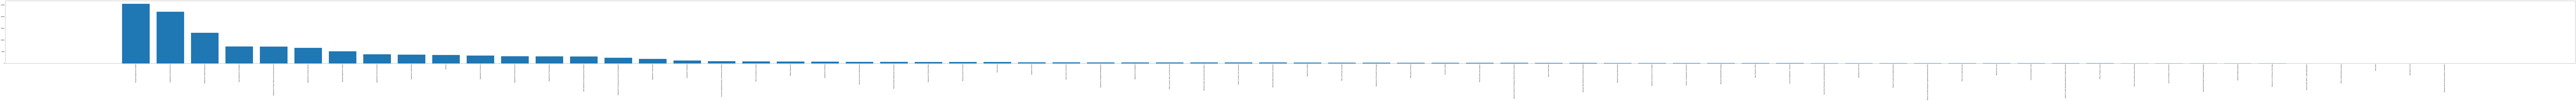

In [ ]:
#Plot histogram
plt.figure(figsize=(400,10))
plt.xticks(rotation=90)
plt.bar(l, x_2021.values(), align='center')
plt.xticks(l, x_2021.keys())


In [ ]:
#Find the total budget for each department for each year
confirmed_total_2017= df_operating_budget[df_operating_budget['Fiscal Year']==2017].groupby(['Agency Name']).agg({'Budget':['sum']})
confirmed_total_2017= np.array(confirmed_total_2017)
confirmed_total_2017 = confirmed_total_2017.flatten()

confirmed_total_2018= df_operating_budget[df_operating_budget['Fiscal Year']==2018].groupby(['Agency Name']).agg({'Budget':['sum']})
confirmed_total_2018= np.array(confirmed_total_2018)
confirmed_total_2018 = confirmed_total_2018.flatten()

confirmed_total_2019= df_operating_budget[df_operating_budget['Fiscal Year']==2019].groupby(['Agency Name']).agg({'Budget':['sum']})
confirmed_total_2019= np.array(confirmed_total_2019)
confirmed_total_2019 = confirmed_total_2019.flatten()

confirmed_total_2020= df_operating_budget[df_operating_budget['Fiscal Year']==2020].groupby(['Agency Name']).agg({'Budget':['sum']})
confirmed_total_2020= np.array(confirmed_total_2020)
confirmed_total_2020 = confirmed_total_2020.flatten()

confirmed_total_2021= df_operating_budget[df_operating_budget['Fiscal Year']==2021].groupby(['Agency Name']).agg({'Budget':['sum']})
confirmed_total_2021= np.array(confirmed_total_2021)
confirmed_total_2021 = confirmed_total_2021.flatten()


print(confirmed_total_2017)

[7.59200800e+06 8.13329000e+05 1.17054029e+08 4.83588800e+07
 7.05766500e+07 3.43644240e+07 1.52631594e+08 1.06340600e+07
 7.46629800e+07 4.40785111e+08 2.41824143e+09 7.43809750e+07
 2.78763909e+08 3.47269548e+08 3.29836283e+08 2.62904510e+07
 1.38747227e+09 3.84560139e+08 4.96953744e+09 2.97267690e+07
 3.96944488e+08 1.09800830e+07 1.43457256e+08 1.81454800e+06
 3.39106600e+06 2.00052700e+06 5.32004381e+08 8.91557280e+07
 1.95900000e+06 3.19011100e+06 1.31802935e+10 4.06098340e+07
 1.16881709e+08 4.98550987e+08 1.59920750e+07 3.08300100e+07
 9.74845370e+07 2.65079120e+07 3.21585300e+07 4.92248560e+07
 2.00702600e+07 6.31993000e+05 2.68120120e+07 1.46403833e+08
 7.90000000e+03 3.25161850e+07 4.27188000e+05 4.03107200e+06
 1.09810843e+08 1.48099400e+06 1.79150027e+08 1.03755800e+06
 1.19072770e+09 2.66899700e+07 2.99982600e+06 8.78238600e+06
 2.26156160e+07 1.32651357e+08 7.66091935e+09 1.60376558e+08
 6.08097800e+06 2.30363200e+06 1.49238293e+09 1.78293000e+06
 1.58994000e+06 1.505090

In [ ]:
#create dataframe with department and respective total budget
df_departments_2017 = pd.DataFrame()
df_departments_2017['Budget'] = confirmed_total_2017
df_departments_2017['Departments']=sorted(x_2017.keys(), key=lambda x:x.lower())

df_departments_2018 = pd.DataFrame()
df_departments_2018['Budget'] = confirmed_total_2018
df_departments_2018['Departments']=sorted(x_2018.keys(), key=lambda x:x.lower())

df_departments_2019 = pd.DataFrame()
df_departments_2019['Budget'] = confirmed_total_2019
df_departments_2019['Departments']=sorted(x_2019.keys(), key=lambda x:x.lower())

df_departments_2020 = pd.DataFrame()
df_departments_2020['Budget'] = confirmed_total_2020
df_departments_2020['Departments']=sorted(x_2020.keys(), key=lambda x:x.lower())

df_departments_2021 = pd.DataFrame()
df_departments_2021['Budget'] = confirmed_total_2021
df_departments_2021['Departments']=sorted(x_2021.keys(), key=lambda x:x.lower())

In [ ]:
#find the 10 largest allotments within the budget
df_departments_2021.nlargest(10, "Budget") 

,Budget,Departments
29,1.507043e+10,Maryland Department of Health
60,8.863876e+09,State Department of Education
19,5.388889e+09,Department of the Environment
12,2.399941e+09,Department of Human Services
64,1.736902e+09,Support for State Operated Institutions of Hig...
17,1.506629e+09,Department of Public Safety and Correctional S...
54,1.345000e+09,Public Debt
25,6.261438e+08,Judiciary
33,6.138572e+08,Maryland Higher Education Commission
32,5.410376e+08,Maryland Health Benefit Exchange


In [ ]:
pd.set_option("display.max_rows",None)

In [ ]:
#sort budgets from largest to smallest 
df_departments_2017 = df_departments_2017.sort_values(by='Budget',ascending=False)
df_departments_2018 = df_departments_2018.sort_values(by='Budget',ascending=False)
df_departments_2019 = df_departments_2019.sort_values(by='Budget',ascending=False)
df_departments_2020 = df_departments_2020.sort_values(by='Budget',ascending=False)
df_departments_2021 = df_departments_2021.sort_values(by='Budget',ascending=False)
df_departments_2021

,Budget,Departments
29,1.507043e+10,Maryland Department of Health
60,8.863876e+09,State Department of Education
19,5.388889e+09,Department of the Environment
12,2.399941e+09,Department of Human Services
64,1.736902e+09,Support for State Operated Institutions of Hig...
...,...,...
0,8.813970e+05,Alcohol and Tobacco Commission
42,7.533230e+05,Maryland Tax Court
3,6.881740e+05,Canal Place Preservation and Development Autho...
49,4.485590e+05,Office of the Deaf and Hard of Hearing


In [ ]:
#sort budgets from smallest to largest
df_departments_2017 = df_departments_2017.sort_values(by='Budget')
df_departments_2018 = df_departments_2018.sort_values(by='Budget')
df_departments_2019 = df_departments_2019.sort_values(by='Budget')
df_departments_2020 = df_departments_2020.sort_values(by='Budget')
df_departments_2021 = df_departments_2021.sort_values(by='Budget')
df_departments_2021

,Budget,Departments
45,5.243500e+04,Office of Administrative Hearings
49,4.485590e+05,Office of the Deaf and Hard of Hearing
3,6.881740e+05,Canal Place Preservation and Development Autho...
42,7.533230e+05,Maryland Tax Court
0,8.813970e+05,Alcohol and Tobacco Commission
...,...,...
64,1.736902e+09,Support for State Operated Institutions of Hig...
12,2.399941e+09,Department of Human Services
19,5.388889e+09,Department of the Environment
60,8.863876e+09,State Department of Education


In [ ]:
#assign budget and department values to variables for bar chart
budget_2017 = df_departments_2017['Budget']
departments_2017 =df_departments_2017['Departments']

budget_2018 = df_departments_2018['Budget']
departments_2018 =df_departments_2018['Departments']

budget_2019 = df_departments_2019['Budget']
departments_2019 =df_departments_2019['Departments']

budget_2020 = df_departments_2020['Budget']
departments_2020 =df_departments_2020['Departments']

budget_2021 = df_departments_2021['Budget']
departments_2021 =df_departments_2021['Departments']

<BarContainer object of 68 artists>

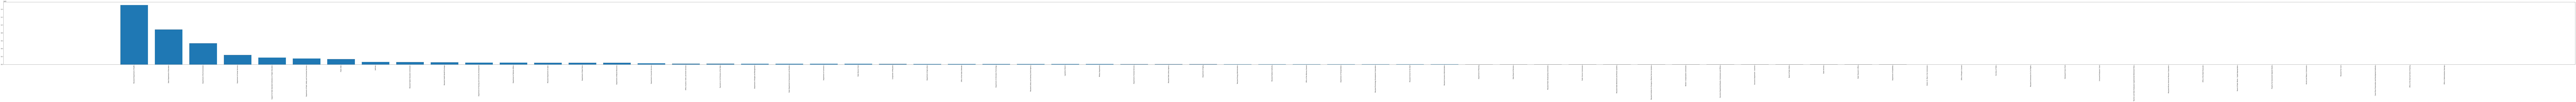

In [ ]:
#plot figure
plt.figure(figsize=(400,10))
plt.xticks(rotation=90)
plt.bar(departments_2021, budget_2021, align='center')
#plt.xticks(budget, x_2021.keys())

<BarContainer object of 68 artists>

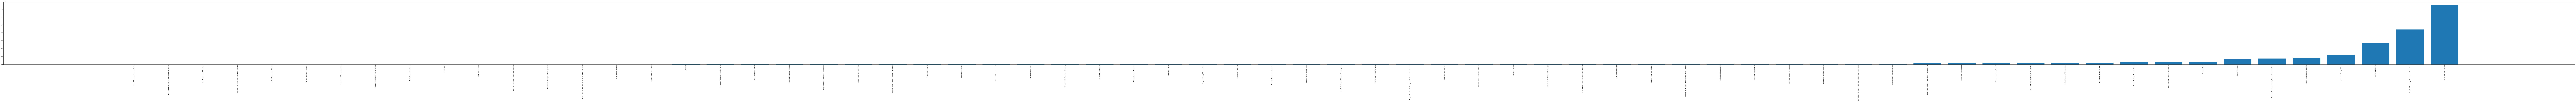

In [ ]:
plt.figure(figsize=(400,10))
plt.xticks(rotation=90)
plt.bar(departments_2021, budget_2021, align='center')